#EDA Assignment

###EDA - 1 Questions:

1. What is the range of selling prices in the dataset?
2. What is the median selling price for bikes in the dataset?
3. What is the most common seller type?
4. How many bikes have driven more than 50,000 kilometers?
5. What is the average km_driven value for each ownership type?
6. What proportion of bikes are from the year 2015 or older?
7. What is the trend of missing values across the dataset?

8. What is the highest ex_showroom_price recorded, and for which bike?
9. What is the total number of bikes listed by each seller type?
10. What is the relationship between selling_price and km_driven for first-owner bikes?
11. Identify and remove outliers in the km_driven column using the IQR methodB
12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
14. Which bike names are priced significantly above the average price for their manufacturing year?
15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

print(df.head())
print(df.info())
print(df.describe())

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 

In [13]:
#Q1.
print("Min price:", df['selling_price'].min())
print("Max price:", df['selling_price'].max())

Min price: 5000
Max price: 760000


In [14]:
#Q2.
print("Median:", df['selling_price'].median())

Median: 45000.0


In [15]:
#Q3.
print(df['seller_type'].value_counts())

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [16]:
#Q4.
print("Bikes > 50k km:", (df['km_driven'] > 50000).sum())

Bikes > 50k km: 170


In [17]:
#Q5.
print(df.groupby('owner')['km_driven'].mean())

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [18]:
#Q6.
print((df['year'] <= 2015).mean())

0.5664467483506126


In [19]:
#Q7.
print(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [20]:
#Q8.
print(df.loc[df['ex_showroom_price'].idxmax()])

name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [21]:
#Q9.
print(df['seller_type'].value_counts())

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


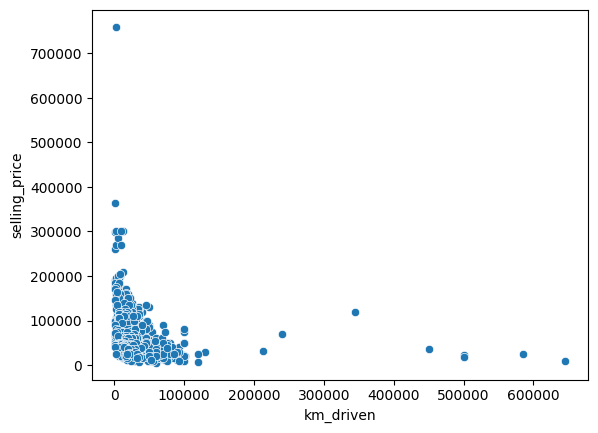

In [22]:
#Q10.
sns.scatterplot(data=df[df['owner']=="1st owner"], x="km_driven", y="selling_price")
plt.show()

In [23]:
#Q11.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]


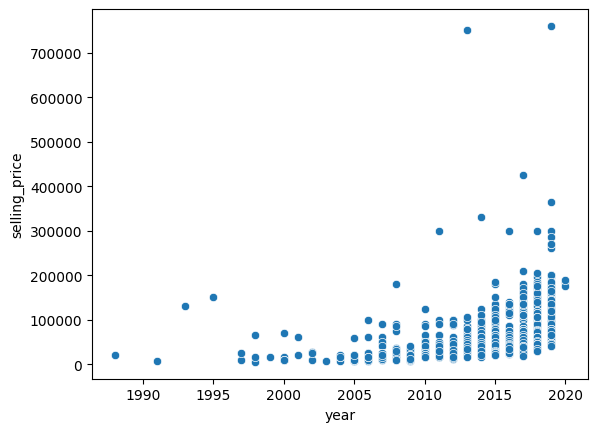

In [24]:
#Q12.
sns.scatterplot(data=df, x="year", y="selling_price")
plt.show()

In [25]:
#Q13.
df['age'] = 2025 - df['year']
print(df.groupby('age')['selling_price'].mean())

age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [26]:
#Q14.
year_avg = df.groupby('year')['selling_price'].mean()
df['year_avg_price'] = df['year'].map(year_avg)
print(df[df['selling_price'] > df['year_avg_price']][['name','year','selling_price']])


                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


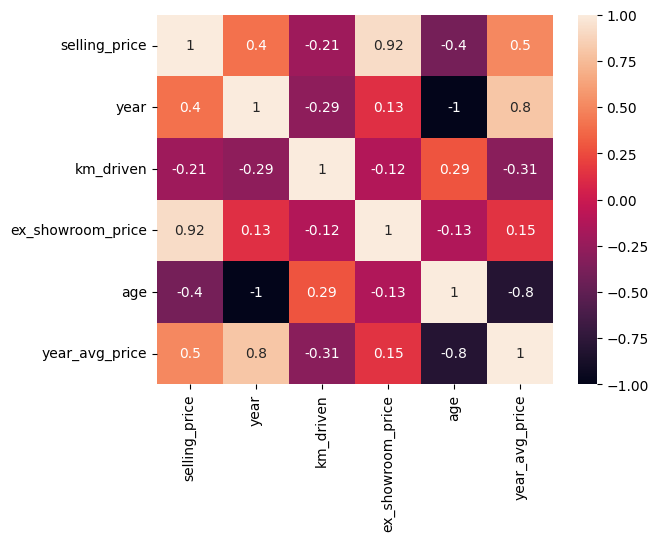

In [27]:
#Q15.
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

#EDA - 2
##Features:

- Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.
- Date: The date when the car sale transaction took place, formatted as YYYY-MM-D.
- Customer Name: The name of the customer who purchased the car, represented as a string.
- Gender: The gender of the customer, categorized as "Male" or "Female.
- Annual Income: The customer's annual income in US dollars, represented as a numeric value.
- Dealer_Name: The name of the dealership selling the car, represented as a string.
- Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.
-  Model: The specific model name of the car, such as "Corolla," "Civic," etc.
- Engine: The engine type of the car, such as "V6," "I4," etc.
- Transmission: The type of transmission in the car, either "Manual" or "Automatic.
- Color: The color of the car, represented as a string (e.g., "Red," "Blue").
- Price ($): The selling price of the car in US dollars.
- Dealer_No: A unique identifier for each car dealer in the dataset.
-  Body Style: The body style of the car, such as "Sedan," "SUV," etc.
-  Phone: The phone number of the customer who purchased the car.
-  Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

##Questions:

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
4. What is the distribution of car prices across different regions?
5. What is the distribution of cars based on body styles?
6. How does the average selling price of cars vary by customer gender and annual income?
7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
8. How does the average car price differ between cars with different engine sizes?
9. How do car prices vary based on the customer’s annual income bracketE
10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look?
11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation?
12.  Is there any seasonal trend in car sales based on the date of sale?
13. How does the car price distribution change when considering different combinations of body style and transmission type?
14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
15. How does the average car price vary across different car models and engine types?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("Car Sale (1).csv")

print(df.head())
print(df.info())
print(df.describe())

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male        13500.0   
1  C_CND_000002  1/2/2022           Gia   Male      1480000.0   
2  C_CND_000003  1/2/2022        Gianna   Male      1035000.0   
3  C_CND_000004  1/2/2022       Giselle   Male        13500.0   
4  C_CND_000005  1/2/2022         Grace   Male      1465000.0   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black    26000.0  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black    19000.0

In [30]:
#Ans-1.
print(df.groupby("Dealer_Name")["Price ($)"].mean())

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27256.394990
C & M Motors Inc                                   28095.388350
Capitol KIA                                        28088.547389
Chrysler Plymouth                                  27894.454191
Chrysler of Tri-Cities                             27882.031683
Classic Chevy                                      28113.372624
Clay Johnson Auto Sales                            27981.601578
Diehl Motor CO Inc                                 27881.153846
Enterprise Rent A Car                              27966.056530
Gartner Buick Hyundai Saab                         28311.988350
Hatfield Volkswagen                                28309.914894
Iceberg Rentals                                    28738.092702
McKinney Dodge Chrysler Jeep                       27324.508772
Motor Vehicle Branch Office                        28367.355212
Nebo Chevrolet                                     28078.123552
New Castle Ford Lincoln Merc

In [31]:
#Ans-2.
print(df.groupby("Company")["Price ($)"].std().sort_values(ascending=False))

Company
Cadillac      19491.857852
Saab          19296.996002
Lincoln       19149.254660
Plymouth      19107.111200
Lexus         17972.569544
Buick         17269.549573
Mercury       16359.021909
Nissan        16209.823727
Oldsmobile    15859.139605
Mercedes-B    15851.608472
Saturn        15847.983108
Ford          15765.596055
Toyota        15208.946534
BMW           14972.003166
Pontiac       14275.797330
Chevrolet     13475.345114
Infiniti      13208.046571
Audi          12769.542514
Subaru        12679.661382
Volkswagen    12673.295524
Volvo         12648.714025
Chrysler      11720.168860
Mitsubishi    11622.630553
Honda         11260.966634
Dodge         11217.766309
Jaguar        10112.070933
Jeep           9456.014186
Acura          8158.682904
Porsche        5223.351221
Hyundai        3541.618537
Name: Price ($), dtype: float64


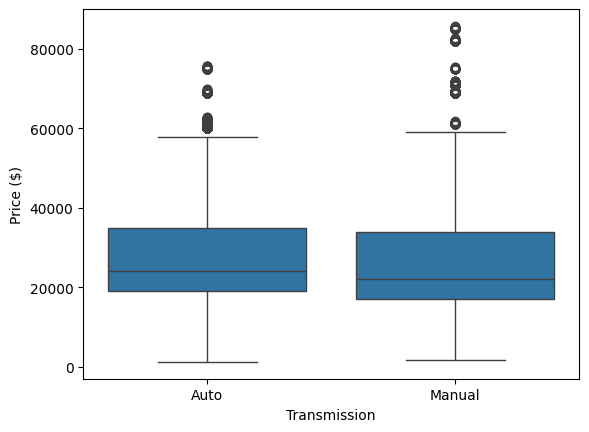

In [32]:
#Ans-3.
sns.boxplot(data=df, x="Transmission", y="Price ($)")
plt.show()

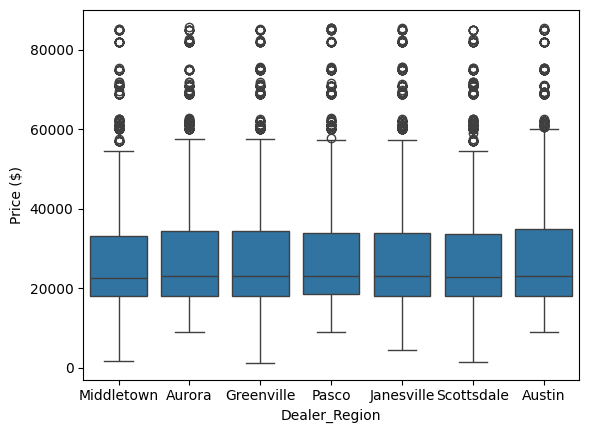

In [33]:
#Ans-4.
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)")
plt.show()

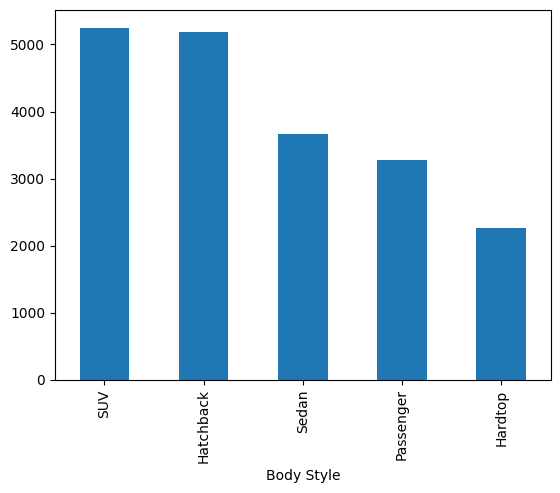

In [34]:
#Ans-5.
df['Body Style'].value_counts().plot(kind='bar')
plt.show()

In [35]:
#Ans-6.
print(df.groupby("Gender")["Price ($)"].mean())

Gender
Female    28242.838136
Male      28047.135133
Name: Price ($), dtype: float64


In [36]:
#Ans-7.
print(df['Dealer_Region'].value_counts())


Dealer_Region
Austin        3399
Janesville    3131
Scottsdale    2814
Aurora        2591
Middletown    2579
Pasco         2574
Greenville    2557
Name: count, dtype: int64


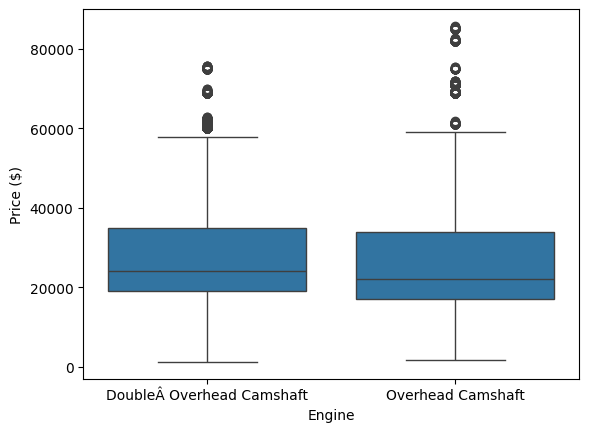

In [37]:
#Ans-8.
sns.boxplot(data=df, x="Engine", y="Price ($)")
plt.show()

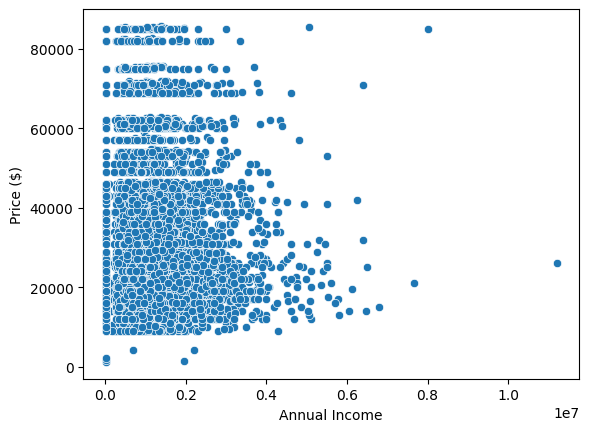

In [38]:
#Ans-9.
sns.scatterplot(data=df, x="Annual Income", y="Price ($)")
plt.show()


In [39]:
#Ans-10.
print(df['Model'].value_counts().head(5))

Model
Diamante      338
Silhouette    338
Prizm         337
Jetta         332
Ram Pickup    321
Name: count, dtype: int64


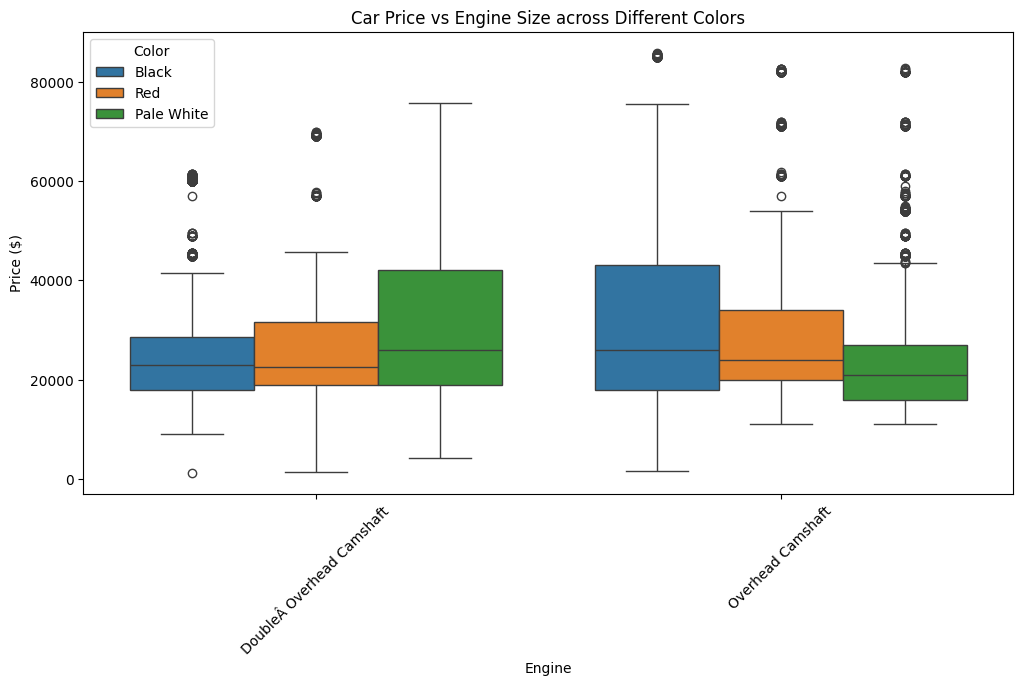

In [40]:
#Ans-11.
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Engine", y="Price ($)", hue="Color")
plt.title("Car Price vs Engine Size across Different Colors")
plt.xticks(rotation=45)
plt.show()

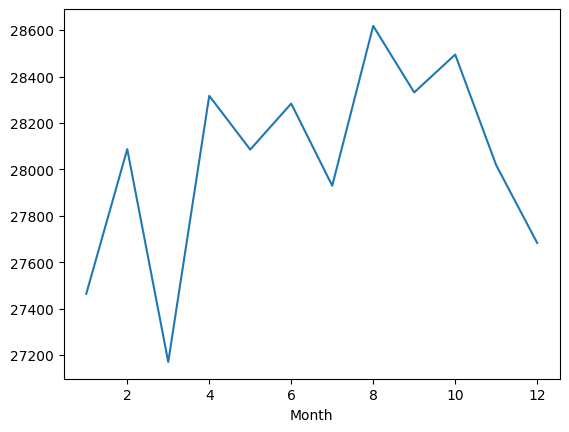

In [41]:
#Ans-12.
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.groupby('Month')['Price ($)'].mean().plot()
plt.show()

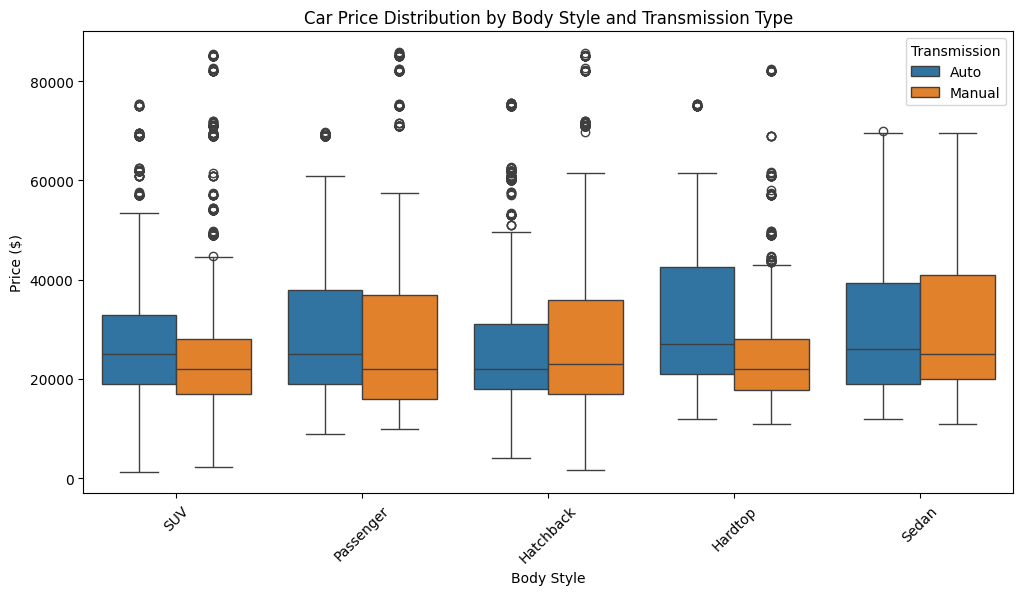

In [42]:
#Ans-13.
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Body Style", y="Price ($)", hue="Transmission")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.show()

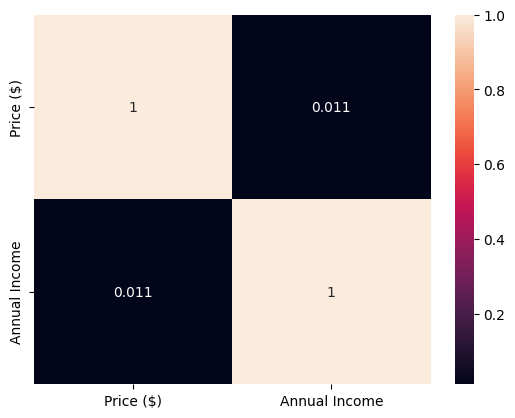

In [43]:
#Ans-14.
sns.heatmap(df[['Price ($)','Annual Income']].corr(), annot=True)
plt.show()

In [44]:
#Ans-15.
pivot_table = df.pivot_table(
    values="Price ($)",
    index="Model",
    columns="Engine",
    aggfunc="mean"
)

print(pivot_table)

Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37329.125874                NaN
3000GT                 22812.330645       21668.513043
300M                   21352.716418                NaN
323i                   16877.483146       21030.266667
328i                   21193.252336       38876.032258
...                             ...                ...
Viper                  32300.882716       26050.300000
Voyager                22066.866667       34561.707965
Windstar               25314.358025       17116.105263
Wrangler               21306.036145       18673.084746
Xterra                 15851.342857       31076.764706

[154 rows x 2 columns]


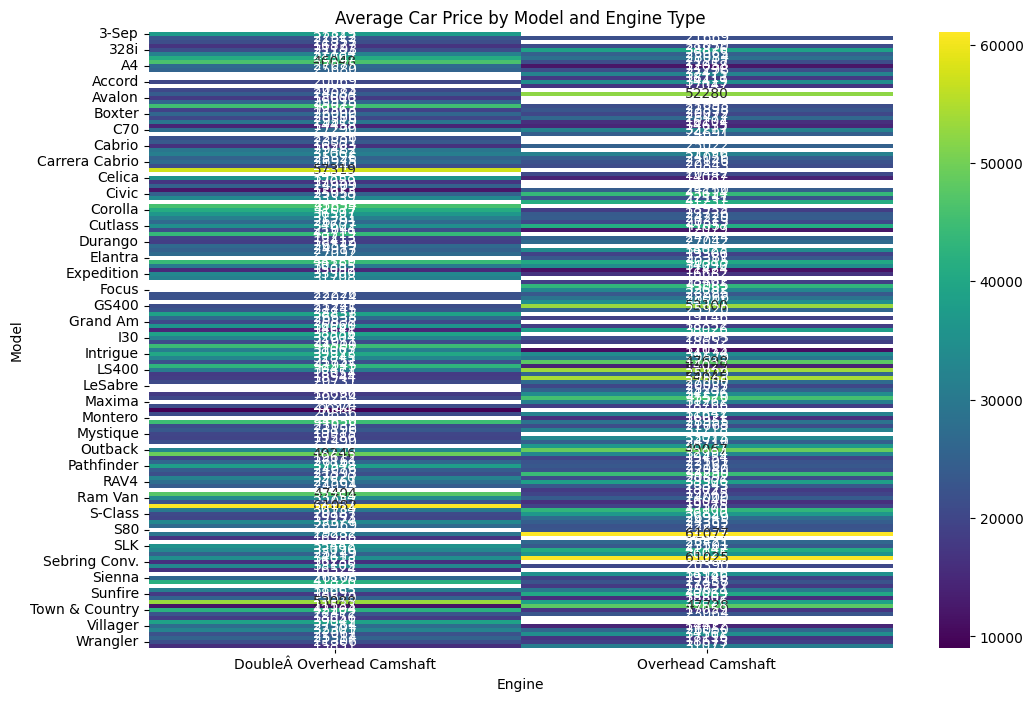

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="viridis")
plt.title("Average Car Price by Model and Engine Type")
plt.show()


#EDA - 3
###Amazon Sales Data

Features:

- product_id: Unique identifier for each product
- product_name: Name of the product
- category: Category of the product
- discounted_price: Discounted price of the product
- actual_price: Actual price of the product
- discount_percentage: Percentage of discount for the product
- rating: Rating of the product (1-5)
- rating_count: Number of people who voted for the Amazon rating
- about_product: Description about the product
- user_id: ID of the user who wrote the review
- user_name: Name of the user who wrote the review
- review_id: ID of the user review
- review_title: Short review
- review_content: Long review
- img_link: Image link of the product
- product_link: Official website link of the product

##Questions:
1. What is the average rating for each product category?
2. What are the top rating_count products by category?
3. What is the distribution of discounted prices vs. actual prices?
4. How does the average discount percentage vary across categories?
5. What are the most popular product names?
6. What are the most popular product keywords?
7. What are the most popular product reviews?
8. What is the correlation between discounted_price and rating?
9. What are the Top 5 categories based on the highest ratings?
10. Identify any potential areas for improvement or optimization based on the data analysis.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df = pd.read_csv("amazon.csv")
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,B07NTKGW45,SaleOn™ Portable Storage Organizer Bag for Ear...,Computers&Accessories|Accessories&Peripherals|...,₹397,₹899,56%,4.0,"3,025",Electronics accessories organizer provides exc...,"AGKYLNZN5SOR4LZAYWRHAAJY6JQQ,AF3KBDP4KUQBIEPOH...","Amazon Customer,Santos,CVN,anonymous,Sacchidan...","R3D7XJFJ5YMCGX,R1XFCHMC5NZ1Y5,R1CKJ6H0A3FZI0,R...","Good at this price,Good product to organize yo...",The product doesn't feel premium. I would say ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/SaleOnTM-Portable-Organi...
928,B08CDKQ8T6,"Portronics Konnect L 1.2Mtr, Fast Charging 3A ...",Computers&Accessories|Accessories&Peripherals|...,₹154,₹349,56%,4.3,"7,064",MORE DURABLE- Konnect L Micro cable is unique ...,"AFDCSF36NJYXASQOJCQWFQTN7SDQ,AGHRDOQP7F74DK6KE...","Arun S.,Jeevan Prasad,mitesh,Tasmai Agrawal,Pa...","R2ACU430AWSQ15,RZFPMZJQG4VEF,R2P7VTDLLMDOA3,R1...","It's working,It's gud 😳,Cable quality is good....","Working fine,very good this da

In [48]:
print(df.dtypes)


product_id              object
product_name            object
category                object
discounted_price        object
actual_price            object
discount_percentage     object
rating                 float64
rating_count            object
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [49]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [50]:
#Ans-1.
print(df.groupby('category')['rating'].mean())


category
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.15
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.60
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.00
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams                        4.20
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|BottledInk                  4.30
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRo

In [51]:
#Ans-2.
print(df.sort_values("rating_count", ascending=False).head())

     product_id                                       product_name  \
750  B00ZRBWPA0       Eveready Red 1012 AAA Batteries - Pack of 10   
32   B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823  B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
151  B08QSDKFGQ  Zoul USB Type C Fast Charging 3A Nylon Braided...   
536  B01FSYQ2A4  boAt Rockerz 400 Bluetooth On Ear Headphones W...   

                                              category discounted_price  \
750  Electronics|GeneralPurposeBatteries&BatteryCha...             ₹159   
32   Computers&Accessories|Accessories&Peripherals|...             ₹389   
823  Computers&Accessories|Accessories&Peripherals|...             ₹389   
151  Computers&Accessories|Accessories&Peripherals|...             ₹339   
536  Electronics|Headphones,Earbuds&Accessories|Hea...           ₹1,399   

    actual_price discount_percentage  rating rating_count  \
750         ₹180                 12%     4.3          989   
32    

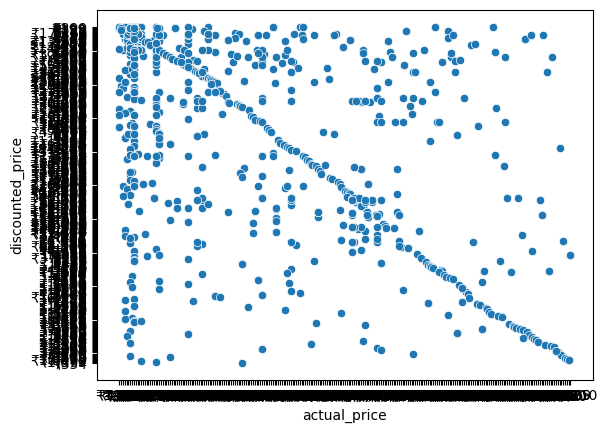

In [52]:
#Ans-3.
sns.scatterplot(data=df, x="actual_price", y="discounted_price")
plt.show()

In [53]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,B07NTKGW45,SaleOn™ Portable Storage Organizer Bag for Ear...,Computers&Accessories|Accessories&Peripherals|...,₹397,₹899,56%,4.0,"3,025",Electronics accessories organizer provides exc...,"AGKYLNZN5SOR4LZAYWRHAAJY6JQQ,AF3KBDP4KUQBIEPOH...","Amazon Customer,Santos,CVN,anonymous,Sacchidan...","R3D7XJFJ5YMCGX,R1XFCHMC5NZ1Y5,R1CKJ6H0A3FZI0,R...","Good at this price,Good product to organize yo...",The product doesn't feel premium. I would say ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/SaleOnTM-Portable-Organi...
928,B08CDKQ8T6,"Portronics Konnect L 1.2Mtr, Fast Charging 3A ...",Computers&Accessories|Accessories&Peripherals|...,₹154,₹349,56%,4.3,"7,064",MORE DURABLE- Konnect L Micro cable is unique ...,"AFDCSF36NJYXASQOJCQWFQTN7SDQ,AGHRDOQP7F74DK6KE...","Arun S.,Jeevan Prasad,mitesh,Tasmai Agrawal,Pa...","R2ACU430AWSQ15,RZFPMZJQG4VEF,R2P7VTDLLMDOA3,R1...","It's working,It's gud 😳,Cable quality is good....","Working fine,very good this da

In [54]:
#Ans-4.
df['discount_percentage'] = df['discount_percentage'].str.replace('%','', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

print(df.groupby("category")["discount_percentage"].mean())





category
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           43.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams                        44.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|BottledInk                   5.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRo

In [55]:
#Ans-5.
print(df['product_name'].value_counts().head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            3
boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)                                                                                                                                         3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                            

In [56]:
#Ans-6.

keywords = df['product_name'].str.lower().str.split(expand=True).stack()
print(keywords.value_counts().head(10))

with        496
for         444
usb         330
cable       298
|           295
&           287
charging    206
and         203
fast        192
to          169
Name: count, dtype: int64


In [57]:
#Ans-7.
print(df['review_title'].value_counts().head(10))

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                                                  8
A Good Braided Cab

In [58]:
#Ans-8.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

print(df[['discounted_price','rating']].corr())

                  discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     1.0


In [59]:
#Ans-9.
print(df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5))

category
Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingKeyboards    4.5
Computers&Accessories|Components|Memory                                              4.5
Electronics|Cameras&Photography|Accessories|Film                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                         4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                   4.5
Name: rating, dtype: float64


In [64]:
#Ans-10.
print("Low rated products:")
print(df[df['rating'] < 3][['product_name','rating']].head())

print("\nCategories with lowest average discount:")
print(df.groupby('category')['discount_percentage'].mean().sort_values().head())

Low rated products:
                                           product_name  rating
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...     2.8
1243  Personal Size Blender, Portable Blender, Batte...     2.3
1286  MR. BRAND Portable USB Juicer Electric USB Jui...     2.8
1309  Khaitan ORFin Fan heater for Home and kitchen-...     2.0
1356  Green Tales Heat Seal Mini Food Sealer-Impulse...     2.6

Categories with lowest average discount:
category
Electronics|Cameras&Photography|Accessories|Film                                                              0.0
Home&Kitchen|CraftMaterials|PaintingMaterials                                                                 0.0
Home&Kitchen|CraftMaterials|DrawingMaterials|DrawingMedia|Pencils|WoodenPencils                               0.0
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                  0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Ref

#EDA - 4
###Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.

###Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

###Column Descriptors:

Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
Track Name: The title of the track, encapsulating its identity and essence.
Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

##Questions:
1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [67]:
#Ans-1.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spotify (1).csv")

print(df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


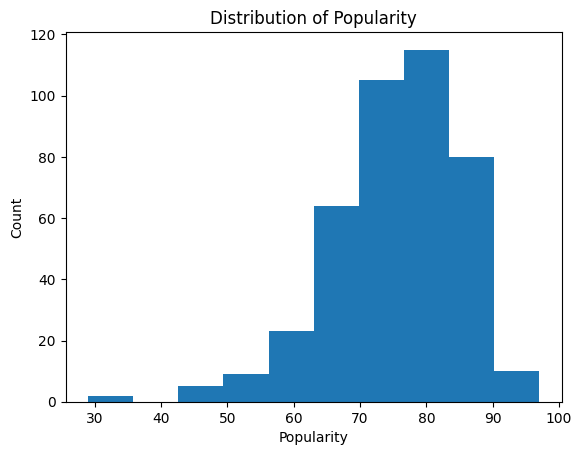

In [68]:
#Ans-2.
plt.hist(df['Popularity'])
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


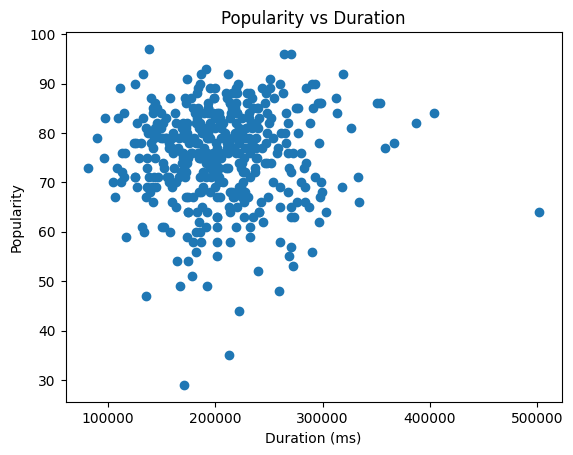

In [69]:
#Ans-3.
plt.scatter(df['Duration (ms)'], df['Popularity'])
plt.title("Popularity vs Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


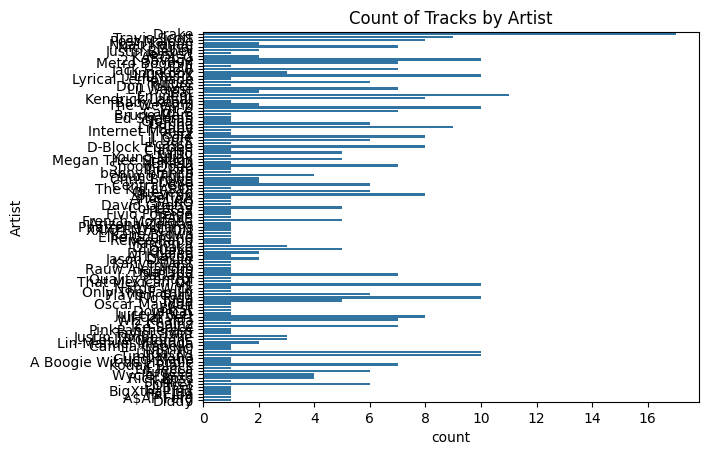

In [70]:
#Ans-4.
sns.countplot(y=df['Artist'])
plt.title("Count of Tracks by Artist")
plt.show()


In [71]:
#Ans-5.
print(df.sort_values("Popularity").head(5)[['Artist','Track Name','Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [72]:
#Ans-6.
print(df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(5))


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [73]:
#Ans-7.
top_artists = df['Artist'].value_counts().head(5).index
for artist in top_artists:
    print(df[df['Artist']==artist].sort_values("Popularity", ascending=False).head(1)[['Artist','Track Name','Popularity']])


  Artist                               Track Name  Popularity
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
    Artist  Track Name  Popularity
80  Eminem  Without Me          90
        Artist         Track Name  Popularity
312  Lil Nas X  THATS WHAT I WANT          81
    Artist       Track Name  Popularity
100  JAY-Z  Ni**as In Paris          86
       Artist Track Name  Popularity
70  21 Savage     redrum          96


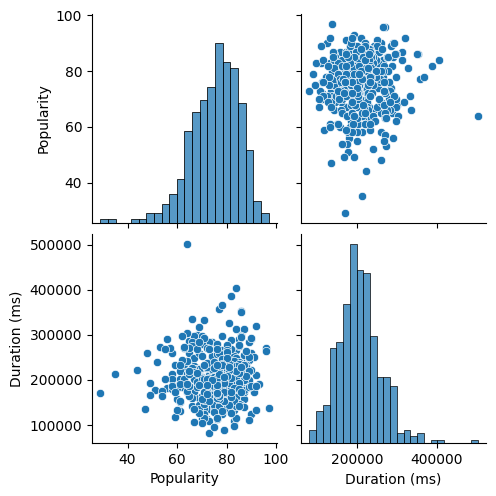

In [74]:
#Ans-8.
sns.pairplot(df.select_dtypes(include='number'))
plt.show()


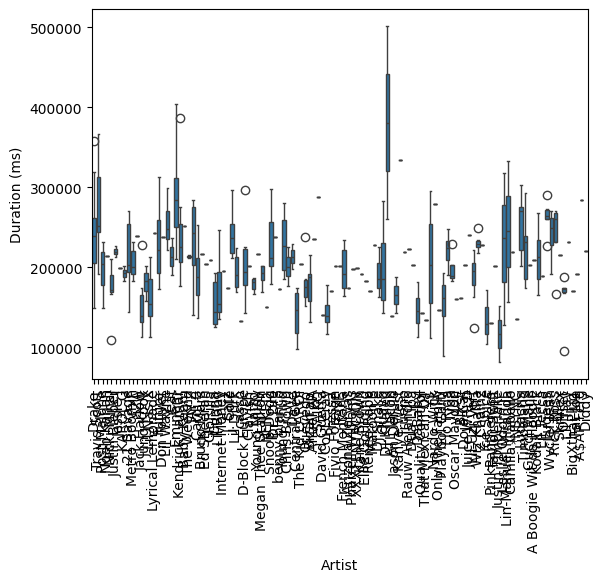

In [75]:
#Ans-9.
sns.boxplot(x="Artist", y="Duration (ms)", data=df)
plt.xticks(rotation=90)
plt.show()


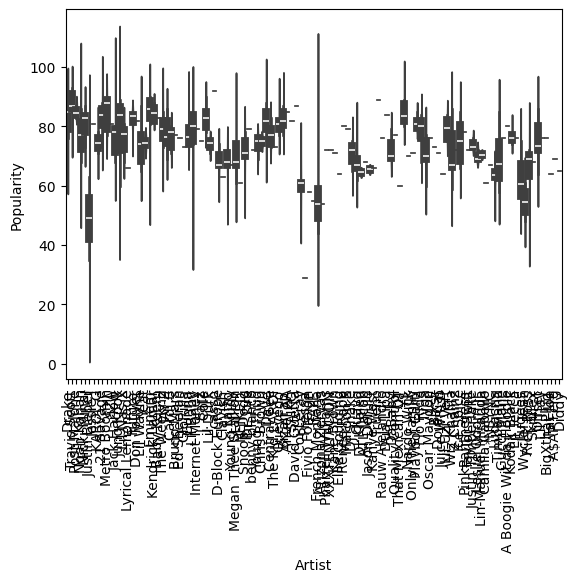

In [76]:
#Ans-10.
sns.violinplot(x="Artist", y="Popularity", data=df)
plt.xticks(rotation=90)
plt.show()
